# Titanic: Machine Learning from Disaster
### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the datasets

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

## Exploratory Data Analysis

In [4]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Initial Takeaways
- The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive.
- The PassengerID and Ticket variables are random unique identifiers, that have no impact on the outcome variable. Thus, they should be dropped.
- The Pclass variable is an ordinal datatype where 1 = upper class, 2 = middle class, and 3 = lower class.
- The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
- The Sex and Embarked variables are a nominal datatype. They are to be converted to numeric variables.
- The Age and Fare variable are continuous quantitative datatypes.
- The SibSp arepresents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. They can be used to create a family size and is alone variable.
- The Cabin variable is a nominal datatype.

## Checking Null Values

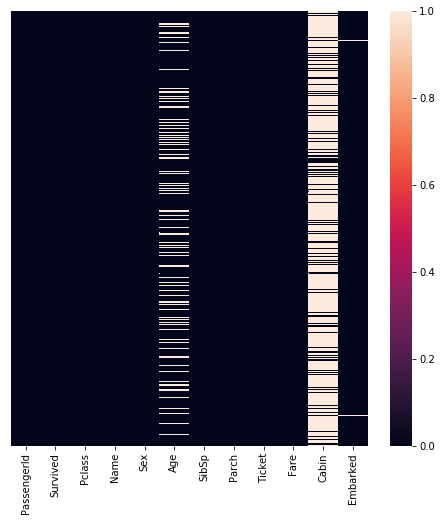

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(),yticklabels=False)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

In [10]:
drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [11]:
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

train['Fare'].fillna(train['Fare'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

## Feature Engineering

In [12]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['IsAlone'] = 1 
train['IsAlone'].loc[train['FamilySize'] > 1] = 0 

test['IsAlone'] = 1 
test['IsAlone'].loc[test['FamilySize'] > 1] = 0

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
train.drop(['SibSp','Parch'], axis=1, inplace = True)
test.drop(['SibSp','Parch'], axis=1, inplace = True)

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,1


In [15]:
def nametitle(name):
    s = name.split(', ')
    t = s[1].split('.')
    return t[0]

In [16]:
train['Name'] = train['Name'].apply(nametitle)
test['Name'] = test['Name'].apply(nametitle)

In [17]:
print(train['Name'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Sir               1
Capt              1
Ms                1
Jonkheer          1
the Countess      1
Mme               1
Don               1
Name: Name, dtype: int64


In [18]:
train['Name'] = train['Name'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Name'] = train['Name'].replace('Mlle', 'Miss')
train['Name'] = train['Name'].replace('Ms', 'Miss')
train['Name'] = train['Name'].replace('Mme', 'Mrs')
    
train[['Name', 'Survived']].groupby(['Name'], as_index=False).mean()

,Name,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
print(test['Name'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Name, dtype: int64


In [20]:
test['Name'] = test['Name'].replace(['Col','Dona', 'Dr', 'Major','Rev'], 'Rare')
test['Name'] = test['Name'].replace('Ms', 'Miss')

## Converting categorical to ordinal

In [21]:
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Name'] = train['Name'].map(mapping).astype(int)
train['Name'] = train['Name'].fillna(0)
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,0,22.0,7.2500,0,2,0
1,1,1,3,1,38.0,71.2833,1,2,0
2,1,3,2,1,26.0,7.9250,0,1,1
3,1,1,3,1,35.0,53.1000,0,2,0
4,0,3,1,0,35.0,8.0500,0,1,1


In [22]:
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test['Name'] = test['Name'].map(mapping)
test['Name'] = test['Name'].fillna(0)
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,1,0,34.5,7.8292,2,1,1
1,3,3,1,47.0,7.0000,0,2,0
2,2,1,0,62.0,9.6875,2,1,1
3,3,1,0,27.0,8.6625,0,1,1
4,3,3,1,22.0,12.2875,0,3,0


## Checking Pearson Correlation

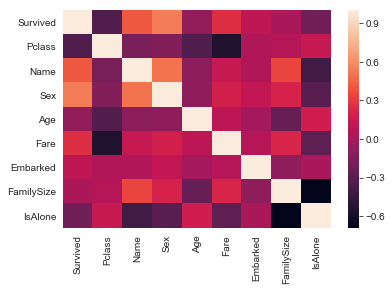

In [23]:
sns.set_style("whitegrid")
sns.heatmap(train.corr(), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

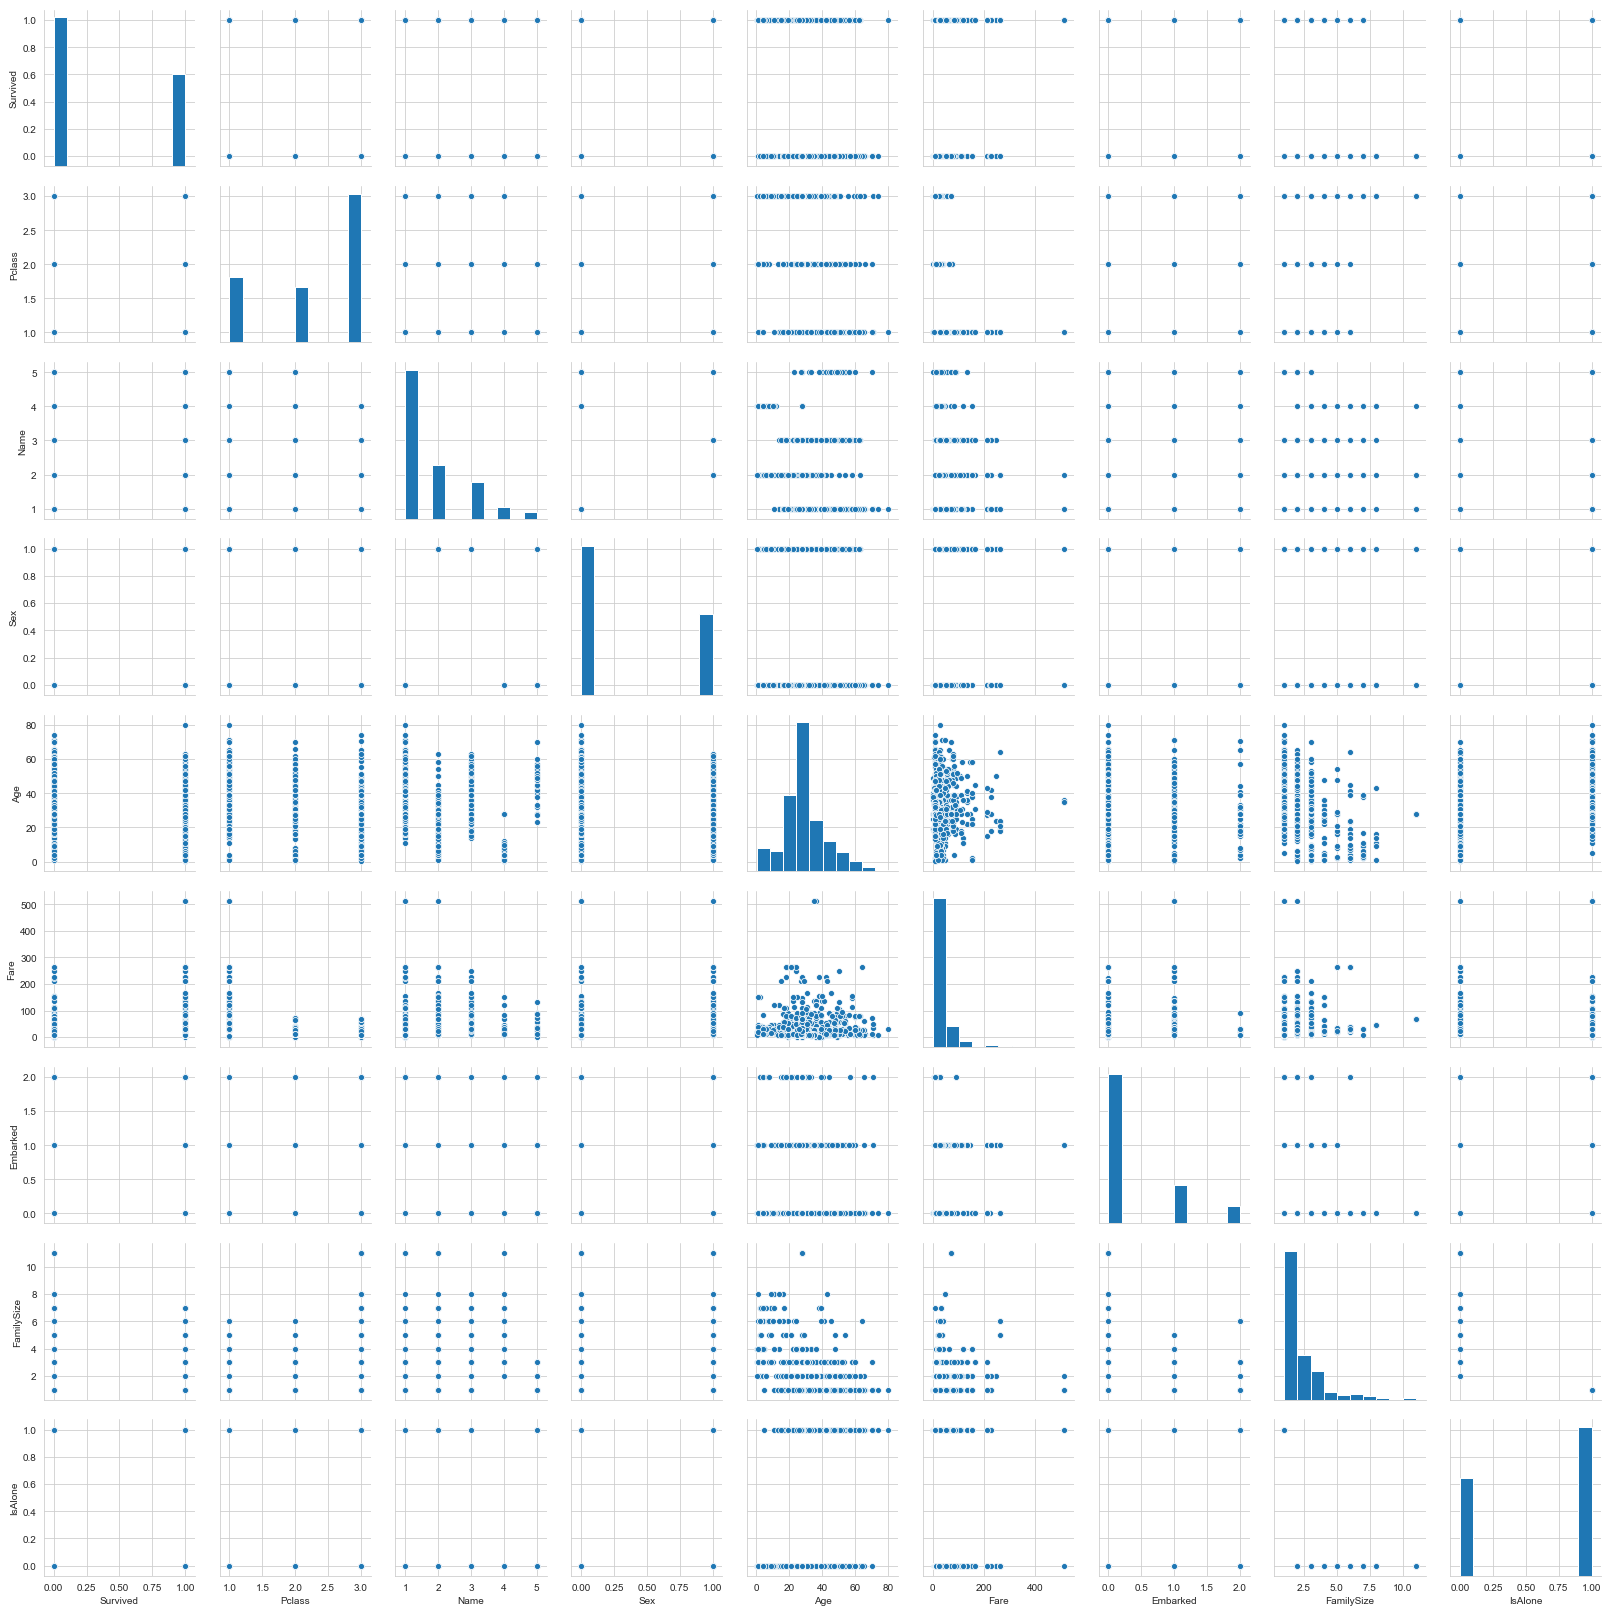

In [24]:
sns.pairplot(train, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

## Lets check accuracy from splitting Train Data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size = 0.25, random_state = 0)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7847533632286996

### K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
knnclassifier.fit(X_train, y_train)
knnclassifier.score(X_test, y_test)

0.7443946188340808

### Support Vector Machines

In [28]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)
svcclassifier.score(X_test, y_test)

0.7892376681614349

### Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)
gnbclassifier.score(X_test, y_test)

0.7892376681614349

### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(X_train, y_train)
dtclassifier.score(X_test, y_test)

0.7802690582959642

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)
rclassifier.score(X_test, y_test)

0.8295964125560538

## Accuracies

### Logistic Regression: 78.47%
### K-Nearest Neighbors:                     74.4 %
### Support Vector Machines:             78.92 %
### Naive Bayes Classifier:                  78.92 %
### Decision Tree Classifier:                78.02 %
### Random Forest:                              82.59 %

# Random Forest is giving the best accuracy. 
# -------------------------------------------------------------------------------------------------------------

# Kaggle Task
### Let's Apply Random Forest on our Test Data

In [32]:
survival = rclassifier.predict(test)
s = pd.DataFrame(survival ,columns = ['Survived'])

In [33]:
s.head()

,Survived
0,0
1,0
2,0
3,1
4,1


In [34]:
testing = pd.read_csv('titanic_test.csv')
pid =pd.DataFrame(testing['PassengerId'])
pid.index = range(0,418)
final = pd.concat([pid,s],axis=1)
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [36]:
final.to_csv('finalsurvival.csv', index = False)

# -----------------------------------------------------------------------------------------------------------